In [1]:
import xeno as x
import random

import csv
import pandas as pd
import ast
import tqdm

import xgboost as xgb
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, mean_squared_error
import sklearn.preprocessing as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cpuの命名規則を定義
def get_name_cpu(index:int):
    return 'test_player'+str(index)


# cpuの行動を定義
def choice_cpu(now,choices,kind):
    number = random.randint(0,len(choices)-1)
    if kind=='opponentChoice':
        choice = choices[number]
        result = choice['select_number']
    else:
        result = choices[number]
    
    # print(f'コンピュータは{result}を選択しました！')
    return result

funcs = [{'get_name':get_name_cpu, 'choice':choice_cpu},{'get_name':get_name_cpu,'choice':choice_cpu}]

In [3]:
df = pd.DataFrame([])

In [4]:
for generation in range(1):
  play_time = 10**1 * 1
  for _ in range(play_time):
      game = x.Game(2,funcs=funcs)
      data = game.game()
      if data[0]:
        logs = data[1]
        for log in logs:
          result = log[-1]
          log = log[:-1]
          for l in log:
            print(type(l))
            data = {}
            now = l['now']
            kind = l['kind']
            choices = l['choices']
            choice = l['choice']
            # print(now.keys())
            card_number = now['card_number']
            my_hands = now['my_hands']
            my_played = now['my_played']
            other_played = now['other_played']
            look_hands = now['look_hands']
            looked_hands = now['looked_hands']
            pred_data = now['pred']
            reincarnation = int(now['reincarnation'])
            
            data['card_number'] = int(card_number)
            for j in range(2):
              if j < len(my_hands):
                data[f'my_hands_{j}'] = int(my_hands[j])
              else:
                data[f'my_hands_{j}'] = 0

            for j in range(15):
              if j < len(my_played):
                data[f'my_played_{j}'] = int(my_played[j])
              else:
                data[f'my_played_{j}'] = 0
            
            for j in range(now['players_length']):
              j += 1
              for k in range(15):
                if j in list(other_played.keys()):
                  if k < len(other_played[j]):
                    data[f'other_played_{j}_{k}'] = int(other_played[j][k])
                  else:
                    data[f'other_played_{j}_{k}'] = 0
                else:
                    data[f'other_played_{j}_{k}'] = 0
              
              for k in range(15):
                if j in list(other_played.keys()):
                  if k < len(look_hands[j]):
                    data[f'look_hands_{j}_{k}'] = int(look_hands[j][k])
                  else:
                    data[f'look_hands_{j}_{k}'] = 0
                else:
                  data[f'look_hands_{j}_{k}'] = 0
              
              for k in range(15):
                if j in list(look_hands.keys()):
                  if k < len(looked_hands[j]):
                    data[f'looked_hands_{j}_{k}'] = int(looked_hands[j][k])
                  else:
                    data[f'looked_hands_{j}_{k}'] = 0
                else:
                  data[f'looked_hands_{j}_{k}'] = 0
              
            for k in range(2):
              if k < len(pred_data):
                data[f'pred_{k}_subject'] = int(pred_data[k]['subject'])
                data[f'pred_{k}_object'] = int(pred_data[k]['object'])
                data[f'pred_{k}_card'] = int(pred_data[k]['pred_card'])
              else:
                data[f'pred_{k}_subject'] = 0
                data[f'pred_{k}_object'] = 0
                data[f'pred_{k}_card'] = 0
            
            data['reincarnation'] = reincarnation
            data['kind'] = kind
            for i in range(10):
              if i < len(choices):
                data[f'choices_{i}'] = choices[i]
              else:
                data[f'choices_{i}'] = 0
            data['choice'] = choice
            data['result'] = result

            insert = pd.DataFrame(data,index=[0]) 
            df = pd.concat([df,insert])
      else:
        err = data[1]
        print(err)
        break

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'di

In [5]:
df

,card_number,my_hands_0,my_hands_1,my_played_0,my_played_1,my_played_2,my_played_3,my_played_4,my_played_5,my_played_6,...,choices_2,choices_3,choices_4,choices_5,choices_6,choices_7,choices_8,choices_9,choice,result
0,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,lose
0,15,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,lose
0,14,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,lose
0,14,4,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,lose
0,14,4,0,2,0,0,0,0,0,0,...,3,4,5,6,7,8,9,10,7,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,8,3,0,7,9,5,0,0,0,0,...,0,0,0,0,0,0,0,0,4,win
0,7,3,4,7,9,5,0,0,0,0,...,0,0,0,0,0,0,0,0,4,win
0,6,3,0,7,9,5,4,0,0,0,...,0,0,0,0,0,0,0,0,10,win
0,5,3,10,7,9,5,4,0,0,0,...,0,0,0,0,0,0,0,0,3,win


In [6]:
df.columns

Index(['card_number', 'my_hands_0', 'my_hands_1', 'my_played_0', 'my_played_1',
       'my_played_2', 'my_played_3', 'my_played_4', 'my_played_5',
       'my_played_6',
       ...
       'choices_2', 'choices_3', 'choices_4', 'choices_5', 'choices_6',
       'choices_7', 'choices_8', 'choices_9', 'choice', 'result'],
      dtype='object', length=128)

In [7]:
df['kind']

0              draw
0              draw
0         play_card
0    opponentChoice
0              pred
          ...      
0              draw
0         play_card
0              draw
0         play_card
0    opponentChoice
Name: kind, Length: 189, dtype: object

In [9]:
df = df.fillna(0)
df = df.reset_index()

In [9]:
set(df['kind'])

{'draw', 'opponentChoice', 'play_card', 'pred', 'trush'}

In [10]:
# データを全て数字化
for i in tqdm.tqdm(range(len(list(df['result'])))):
    if df.iloc[i]['result'] == 'lose':
        df.at[i,'result'] = 0
    else:
        df.at[i,'result'] = 1
    
    print(df.iloc[i]['kind'])
    if df.iloc[i]['kind'] == 'draw':
        df.at[i,'kind'] = 0
    elif df.iloc[i]['kind'] == 'opponentChoice':
        df.at[i,'kind'] = 1
    elif df.iloc[i]['kind'] == 'play_card':
        df.at[i,'kind'] = 2
    elif df.iloc[i]['kind'] == 'pred':
        df.at[i,'kind'] = 3
    elif df.iloc[i]['kind'] == 'trush':
        df.at[i,'kind'] = 4
    
df = df.astype(float)
print(df.dtypes)

100%|██████████| 189/189 [00:00<00:00, 4914.56it/s]

draw
draw
play_card
opponentChoice
pred
draw
play_card
draw
play_card
draw
play_card
opponentChoice
trush
draw
draw
play_card
opponentChoice
draw
play_card
draw
play_card
opponentChoice
pred
draw
draw
play_card
opponentChoice
draw
draw
play_card
opponentChoice
pred
draw
play_card
opponentChoice
draw
play_card
opponentChoice
draw
draw
play_card
opponentChoice
draw
draw
play_card
opponentChoice
pred
draw
draw
play_card
opponentChoice
draw
play_card
opponentChoice
trush
draw
draw
play_card
opponentChoice
draw
draw
draw
play_card
opponentChoice
draw
draw
play_card
draw
play_card
opponentChoice
draw
play_card
draw
play_card
draw
draw
play_card
draw
play_card
draw
play_card
opponentChoice
pred
draw
play_card
opponentChoice
draw
draw
play_card
draw
play_card
draw
draw
play_card
draw
draw
play_card
opponentChoice
draw
draw
play_card
draw
play_card
opponentChoice
draw
play_card
opponentChoice
trush
draw
play_card
opponentChoice
draw
draw
play_card
opponentChoice
draw
play_card
opponentChoice
pr

In [15]:
df[df['kind']==1]['choices_0']

3      2.0
11     2.0
16     1.0
21     1.0
26     1.0
30     2.0
34     2.0
37     2.0
41     2.0
45     1.0
50     1.0
53     1.0
58     2.0
63     1.0
69     2.0
81     1.0
85     1.0
97     2.0
103    1.0
106    1.0
110    1.0
114    2.0
117    2.0
121    2.0
126    1.0
132    2.0
135    2.0
146    2.0
151    1.0
156    1.0
160    2.0
165    2.0
168    2.0
176    2.0
183    1.0
188    1.0
Name: choices_0, dtype: float64

In [ ]:

df.columns

/var/folders/jy/gtsybqmx72s2yd3804v9x20m0000gn/T/ipykernel_75049/1323742538.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Index(['index', 'card_number', 'my_hands_0', 'my_hands_1', 'my_played_0',
       'my_played_1', 'my_played_2', 'my_played_3', 'my_played_4',
       'my_played_5',
       ...
       'choices_2', 'choices_3', 'choices_4', 'choices_5', 'choices_6',
       'choices_7', 'choices_8', 'choices_9', 'choice', 'result'],
      dtype='object', length=129)

In [8]:
# df = df.drop(columns=['index'])
df[df['kind']==1]

NameError: name 'df' is not defined

In [11]:
print(df.dtypes)

card_number    float64
my_hands_0     float64
my_hands_1     float64
my_played_0    float64
my_played_1    float64
                ...   
choices_7      float64
choices_8      float64
choices_9      float64
choice         float64
result         float64
Length: 128, dtype: object


In [12]:
from seaborn_analyzer import regplot
from xgboost import XGBRegressor
from sklearn.model_selection import KFold



In [13]:
xcolumns = list(df.columns)
xcolumns.remove('result')

In [14]:
df_test = df

OBJECTIVE_VARIALBLE = 'result'  # 目的変数
USE_EXPLANATORY = xcolumns
df_test[USE_EXPLANATORY]

,card_number,my_hands_0,my_hands_1,my_played_0,my_played_1,my_played_2,my_played_3,my_played_4,my_played_5,my_played_6,...,choices_1,choices_2,choices_3,choices_4,choices_5,choices_6,choices_7,choices_8,choices_9,choice
0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,12.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score

# 乱数シード
seed = 42

X = df_test[USE_EXPLANATORY].values
y = df_test[OBJECTIVE_VARIALBLE].values

fit_params = {'verbose': 0,  # 学習中のコマンドライン出力
            #   'early_stopping_rounds': 10,  # 学習時、評価指標がこの回数連続で改善しなくなった時点でストップ
            #   'eval_metric': 'rmse',  # early_stopping_roundsの評価指標
              'eval_set': [(X, y)]  # early_stopping_roundsの評価指標算出用データ
              }

cv = KFold(n_splits=5, shuffle=True, random_state=seed)  # KFoldでクロスバリデーション分割指定

model = XGBRegressor()

scoring = 'neg_mean_squared_error'  # 評価指標をRMSEに指定
# クロスバリデーションで評価指標算出
scores = cross_val_score(model, X, y, cv=cv,
                         scoring=scoring, n_jobs=-1, fit_params=fit_params)
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

/Users/huchi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


scores=[-0. -0. -0. -0. -0.]
average_score=0.0


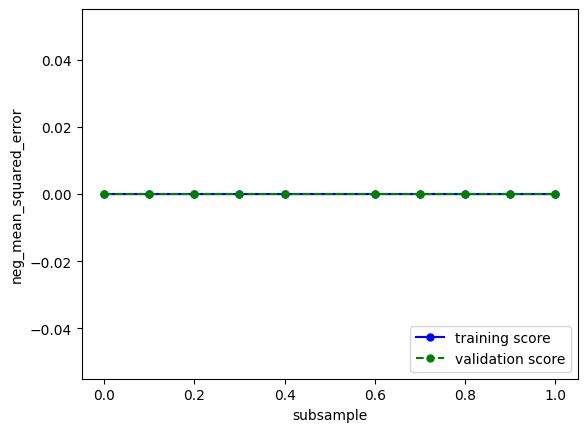

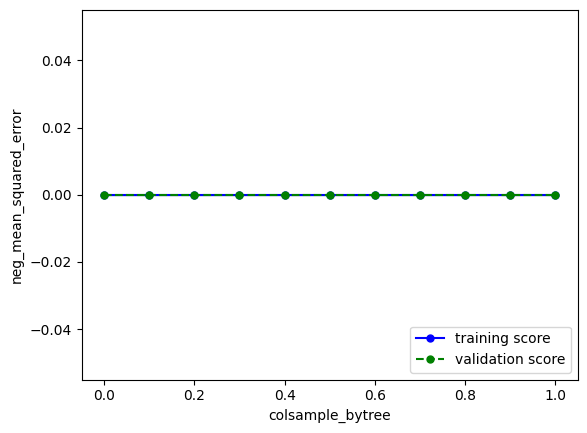

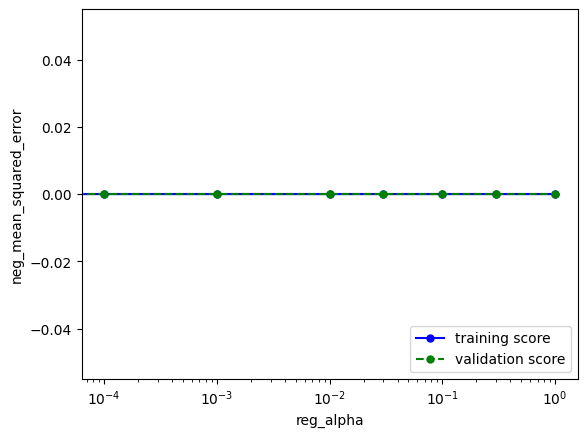

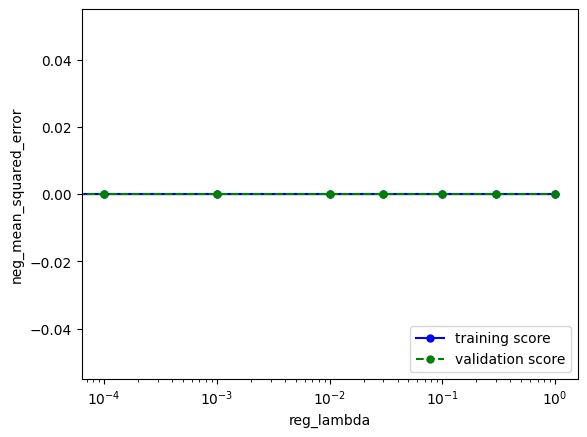

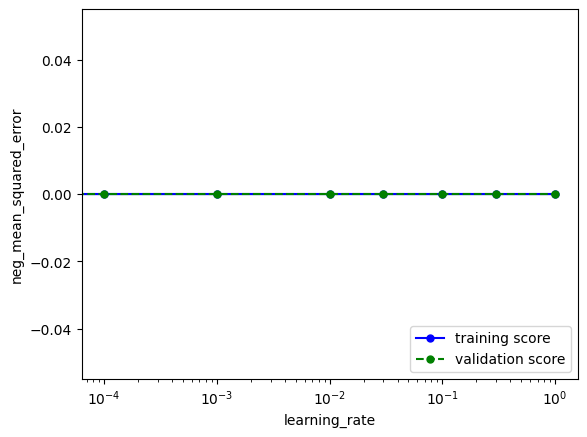

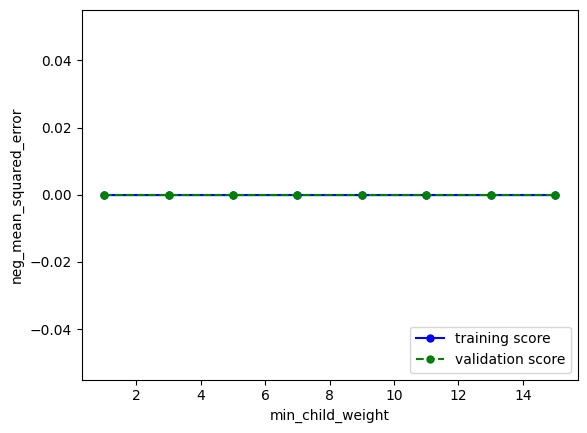

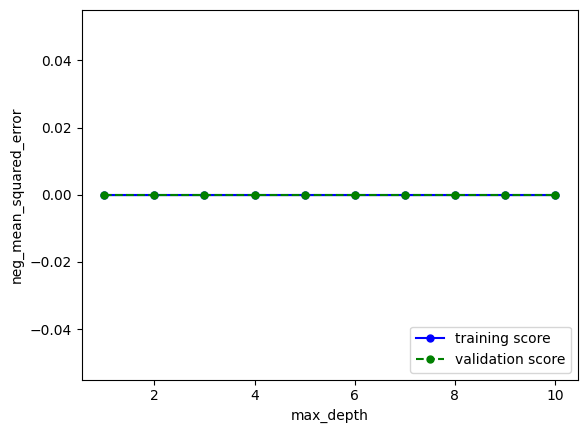

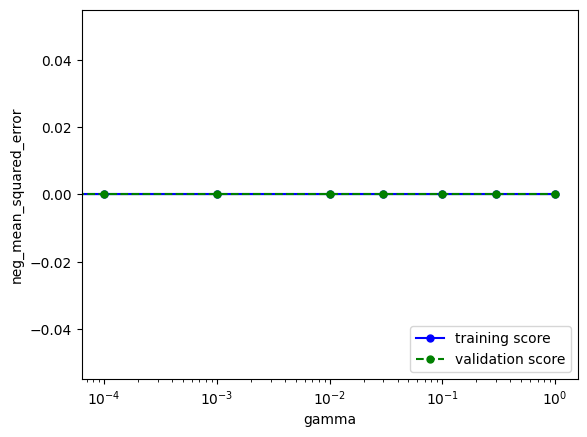

In [16]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
cv_params = {'subsample': [0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0],
             'colsample_bytree': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'reg_alpha': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'reg_lambda': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'learning_rate': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'min_child_weight': [1, 3, 5, 7, 9, 11, 13, 15],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'gamma': [0, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0]
             }
param_scales = {'subsample': 'linear',
                'colsample_bytree': 'linear',
                'reg_alpha': 'log',
                'reg_lambda': 'log',
                'learning_rate': 'log',
                'min_child_weight': 'linear',
                'max_depth': 'linear',
                'gamma': 'log'
                }
# 検証曲線のプロット（パラメータ毎にプロット）
for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールをparam_scalesに合わせて変更
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()


In [17]:
import optuna
import time
start = time.time()
# ベイズ最適化時の評価指標算出メソッド
def bayes_objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 8),
        'max_depth': trial.suggest_int('max_depth', 1, 4),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 0.1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 0.1, log=True),
        'gamma': trial.suggest_float('gamma', 0.0001, 0.1, log=True),
    }
    # モデルにパラメータ適用
    model.set_params(**params)
    # cross_val_scoreでクロスバリデーション
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, fit_params=fit_params, n_jobs=-1)
    val = scores.mean()
    return val

# ベイズ最適化を実行
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(bayes_objective, n_trials=600)

# 最適パラメータの表示と保持
best_params = study.best_trial.params
best_score = study.best_trial.value
print(f'最適パラメータ {best_params}\nスコア {best_score}')
print(f'所要時間{time.time() - start}秒')


[I 2025-05-04 02:14:47,028] A new study created in memory with name: no-name-7e70fcd4-330c-4363-a579-78244051a559
/Users/huchi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[I 2025-05-04 02:14:47,129] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.03574712922600244, 'min_child_weight': 8, 'max_depth': 3, 'colsample_bytree': 0.6789267873576292, 'subsample': 0.3248149123539492, 'reg_alpha': 0.002051110418843397, 'reg_lambda': 0.0013066739238053278, 'gamma': 0.0396760507705299}. Best is trial 0 with value: 0.0.
[I 2025-05-04 02:14:47,205] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.07725378389307355, 'min_child_weight': 6, 'max_depth': 1, 'colsample_bytree': 0.9759278817295955, 'subsample': 0.8659541126403374, 'reg_alpha': 0.0026587543983272706, 'reg_lambda': 0.00231020188784

最適パラメータ {'learning_rate': 0.03574712922600244, 'min_child_weight': 8, 'max_depth': 3, 'colsample_bytree': 0.6789267873576292, 'subsample': 0.3248149123539492, 'reg_alpha': 0.002051110418843397, 'reg_lambda': 0.0013066739238053278, 'gamma': 0.0396760507705299}
スコア 0.0
所要時間57.673418045043945秒


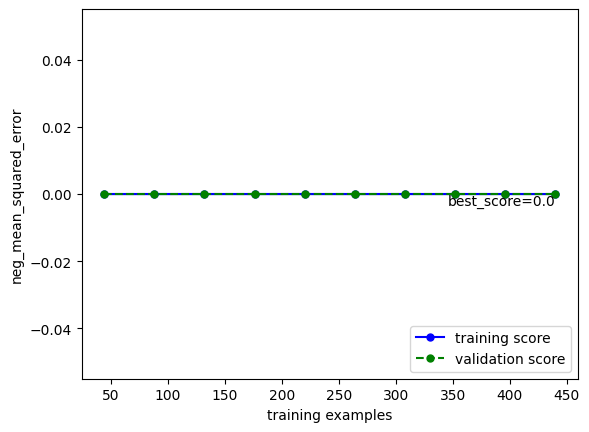

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# 最適パラメータを学習器にセット
model.set_params(**best_params)

# 学習曲線の取得
train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                         X=X, y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         fit_params=fit_params,
                                                         cv=cv, scoring=scoring, n_jobs=-1)
# 学習データ指標の平均±標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std
# 検証データ指標の平均±標準偏差を計算
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std
# training_scoresをプロット
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scoresをプロット
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')
# 最高スコアの表示
best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
# 軸ラベルおよび凡例の指定
plt.xlabel('training examples')  # 学習サンプル数を横軸ラベルに
plt.ylabel(scoring)  # スコア名を縦軸ラベルに
plt.legend(loc='lower right')  # 凡例

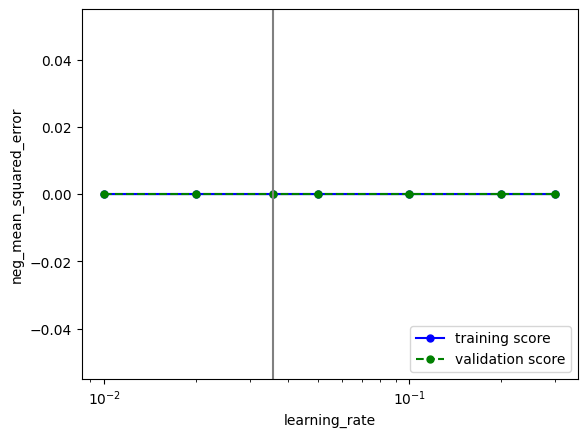

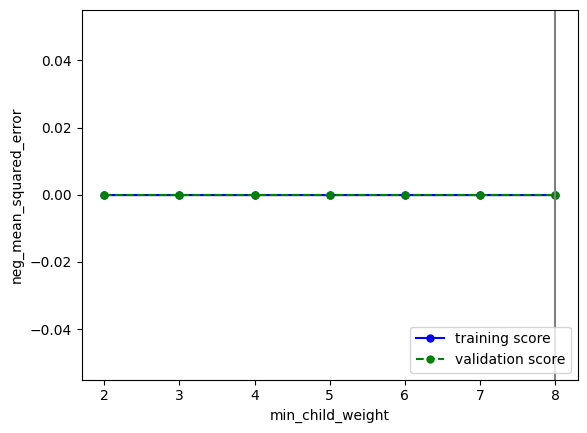

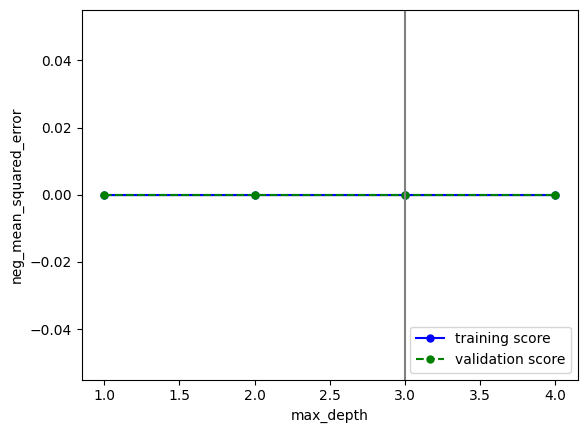

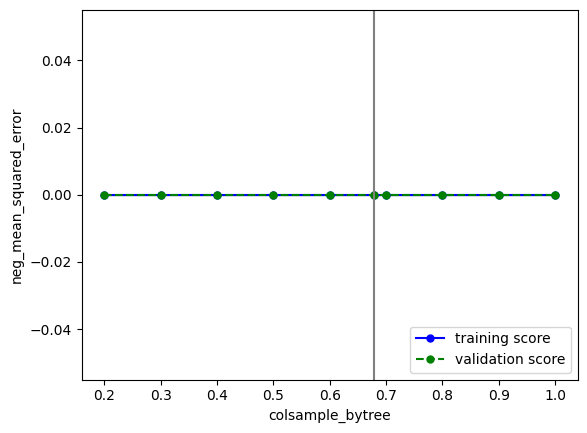

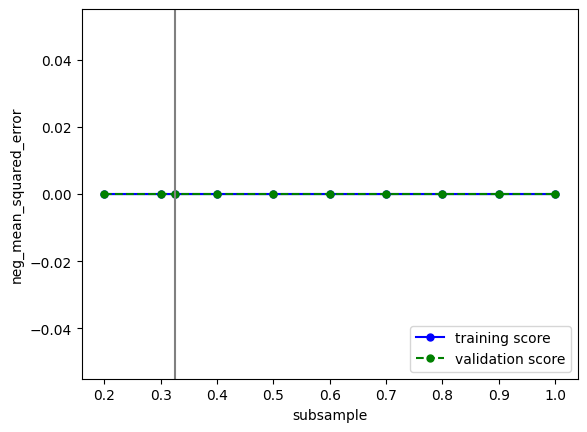

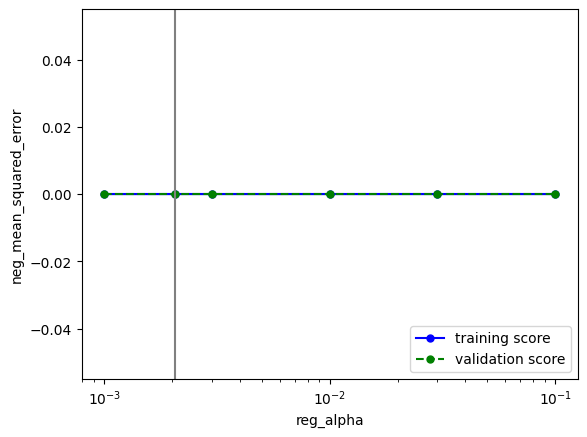

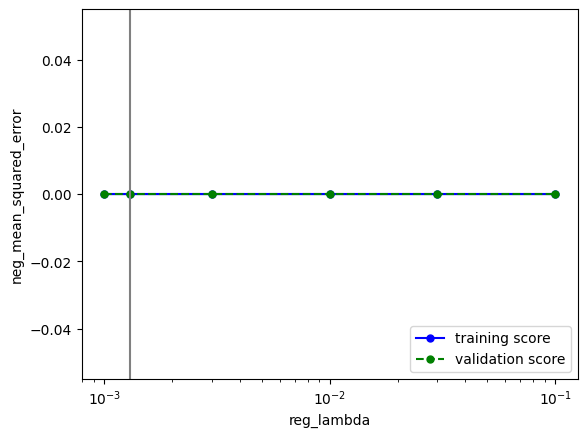

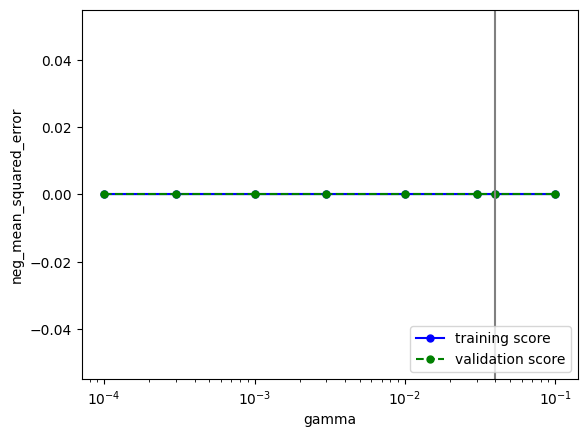

In [19]:
from sklearn.model_selection import validation_curve
# 検証曲線描画対象パラメータ
valid_curve_params = {'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
                      'min_child_weight': [2, 3, 4, 5, 6, 7, 8],
                      'max_depth': [1, 2, 3, 4],
                      'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      'reg_alpha': [0.001, 0.003, 0.01, 0.03, 0.1],
                      'reg_lambda': [0.001, 0.003, 0.01, 0.03, 0.1],
                      'gamma': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
                      }
param_scales = {'learning_rate': 'log',
                'min_child_weight': 'linear',
                'max_depth': 'linear',
                'colsample_bytree': 'linear',
                'subsample': 'linear',                
                'reg_alpha': 'log',
                'reg_lambda': 'log',                
                'gamma': 'log'
                }
# 最適パラメータを上記描画対象に追加
for k, v in valid_curve_params.items():
    if best_params[k] not in v:
        v.append(best_params[k])
        v.sort()
for i, (k, v) in enumerate(valid_curve_params.items()):
    # モデルに最適パラメータを適用
    model.set_params(**best_params)
    # 検証曲線を描画
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # 最適パラメータを縦線表示
    plt.axvline(x=best_params[k], color='gray')
    # スケールをparam_scalesに合わせて変更
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

In [20]:
import joblib

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params

best_model = XGBRegressor(**best_params)
best_model.fit(X, y)
joblib.dump(best_model, f'xeno_xgbregressor.pkl')

['xeno_xgbregressor.pkl']

In [29]:
scores = {'3':0.4,'2':0.6}
select = max(scores, key=scores.get)
select

'2'